<a href="https://colab.research.google.com/github/Champjiwrd/CE63-21-ObjectDetection/blob/master/ClothSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imutils

In [ ]:
import numpy as np
import cv2

lower = np.array([0, 58, 30], dtype = "uint8")
upper = np.array([33, 255, 255], dtype = "uint8")

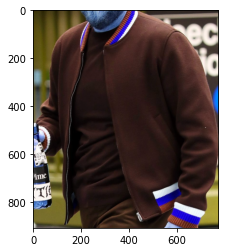

In [ ]:
name = '3.jpg'
frame = cv2.imread(name)
import matplotlib.pyplot as plt
plt.imshow(frame)

In [ ]:
import imutils
frame = imutils.resize(frame, width = 400)
converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
skinMask = cv2.inRange(converted, lower, upper)
# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
# blur the mask to help remove noise, then apply the
# mask to the frame
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skin = cv2.bitwise_and(frame, frame, mask = skinMask)

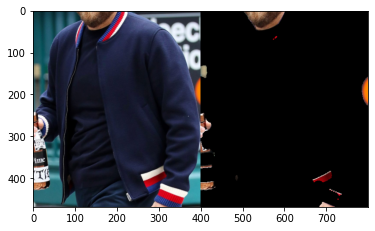

In [ ]:
plt.imshow(np.hstack([cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)]))